# A Visual Introduction to Machine Learning
* Let's look at that example with the tools we're going to be using for this course
* Don't worry, at this point you're not expect to know the details...

In [1]:
# Pandas is a commonly-used data analysis tool for Python
import pandas as pd

In [2]:
# Read in the SF vs. NY data and take a look...
data = pd.read_csv('https://raw.githubusercontent.com/jadeyee/r2d3-part-1-data/master/part_1_data.csv', skiprows=2)
data.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [3]:
# sklearn (SciKit-learn) is a popular ML package we will be using
from sklearn.tree import DecisionTreeClassifier

## Digression: Terminology
* It's common in ML for the input (i.e., the data used to train the model) to be labeled __`X`__ and the target (i.e., what you are trying to predict) to be labeled __`y`__
* Note that what we want to predict is whether the home is in SF or NY
* The first column tells us that by using a "dummy variable", an integer whose value is 0 if the home is in NY or 1 if it's in SF
* We need to remove that column and identify it as __`y`__

In [4]:
X = data
y = X.in_sf
X = X.drop(columns=['in_sf'])

In [5]:
X

,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,2.0,1.0,999000,1960,1000,999,10
1,2.0,2.0,2750000,2006,1418,1939,0
2,2.0,2.0,1350000,1900,2150,628,9
3,1.0,1.0,629000,1903,500,1258,9
4,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...
487,5.0,2.5,1800000,1890,3073,586,76
488,2.0,1.0,695000,1923,1045,665,106
489,3.0,2.0,1650000,1922,1483,1113,106
490,1.0,1.0,649000,1983,850,764,163


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
487    1
488    1
489    1
490    1
491    1
Name: in_sf, Length: 492, dtype: int64

## Let's create a Decision Tree...

In [7]:
tree = DecisionTreeClassifier(max_depth=2)

## Now let's train the Decision Tree on our data
* this process is called _fitting_ the data
* once we fit the data, we have a _model_, which is essentially a predictor
  * we "feed" the model some data describing a home...
  * ...and it will predict whether the home is in SF or NY

In [8]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## Let's take a look at the decision tree...

In [9]:
# We'll use a tool called graphviz to generate a graph (.dot file)
# If it doesn't work, we'll use scikit-learn to see the tree...
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="sf_vs_ny_tree.dot",
               feature_names=X.columns,
               class_names='NY SF'.split(),
               rounded=True,
               filled=True)

If you get an error in the following cell because dot does not work for you you can run
__`%pip install graphviz`__

In [ ]:
%pip install graphviz

zsh:1: command not found: dot


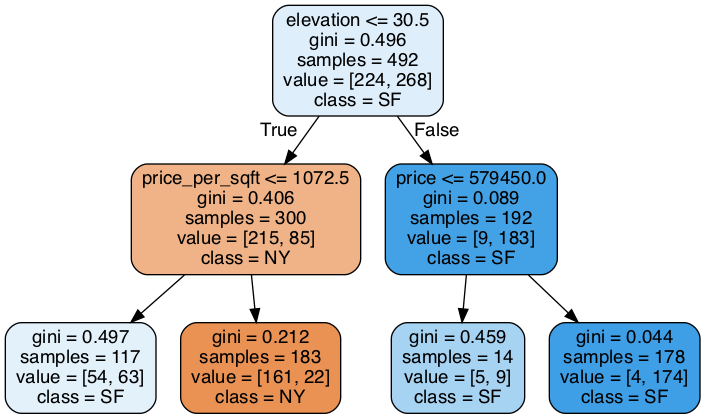

In [10]:
# The dot command will convert the tree from a .dot file to a .png
!dot -Tpng sf_vs_ny_tree.dot -o sf_vs_ny.png
from IPython.display import Image
Image('sf_vs_ny.png')

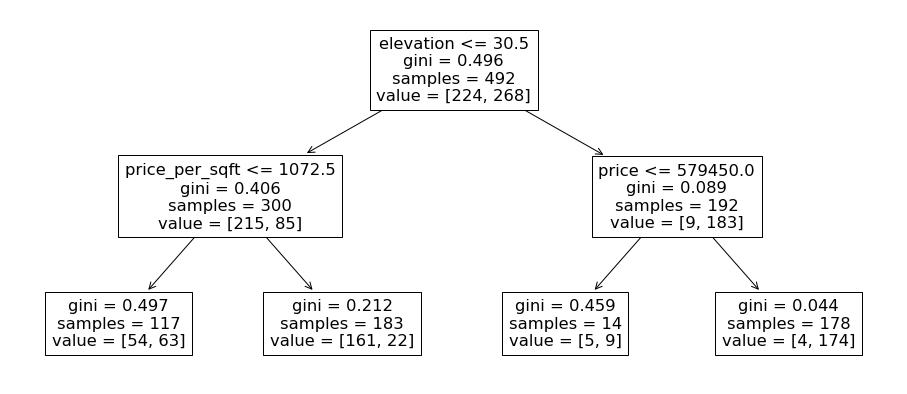

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 7))
plot_tree(tree, feature_names=X.columns);

## Now let's check our accuracy...

In [12]:
tree.score(X, y)

0.8272357723577236